<div align="center">
    <h1> Optimization - Gradients </h1>
</div>

In [16]:
%matplotlib widget

import numpy as np
import matplotlib.pyplot as plt

In [17]:
def plot_func(func, x, y, x_start, x_min, trajectory, type=1):
    '''
    Function to plot the contour and the optimization trajectory

    Parameters:
    func - function to optimize
    x_start - starting point
    x_min - minimum point
    trajectory - optimization trajectory
    type - type of contour -> 1 for cmap='viridis' and 2 for 'royalblue square style'
    '''
    arx = plt.figure().add_subplot(projection='3d')
    X, Y = np.meshgrid(x, y)

    if type == 2:
        arx.plot_surface(X, Y, func([X, Y]), edgecolor='royalblue', lw=0.5, rstride=8, cstride=8, alpha=0.3)
    else:
        arx.contour3D(X, Y, func([X, Y]), 60, cmap='viridis')

    arx.set_xlabel('x')
    arx.set_ylabel('y')
    arx.set_zlabel('f(x, y)')

    
    arx.scatter(x_start[0], x_start[1], func(x_start), color='red')
    arx.scatter(x_min[0], x_min[1], func(x_min), color='black')
    arx.plot(trajectory[:, 0], trajectory[:, 1], func(trajectory.T), color='red')
    plt.show()

In [18]:
#Choose the function which you want to plot

def func(x):
    # Function 1
    #return x[0]**2 + x[1]**2

    # Function 2
    #return np.cos(x[1]) * np.sin(x[0])**2 + 1 / (x[0]**2 + x[1]**2 + 1) - np.cos(x[0])

    # Function 3
    return 0.5*(x[0] - 4.5)**2 + 2.5*(x[1] - 2.3)**2

def func_grad(x):
    #Function 1
    #return np.array([2*x[0], 2*x[1]])

    #Function 2
    #x_grad = -np.sin(x[0]) * np.sin(x[1]) + 2*x[0] / (x[0]**2 + x[1]**2 + 1)**2 + np.sin(x[0])
    #y_grad = np.cos(x[0]) * np.cos(x[1]) + 2*x[1] / (x[0]**2 + x[1]**2 + 1)**2 - np.cos(x[1])
    #return np.array([x_grad, y_grad])

    #Function 3
    return np.array([x[0] - 4.5, 5*(x[1] - 2.3)])

* The method of Gradient Descent

Minimum point: [4.49018165 2.3       ]
Number of steps: 718


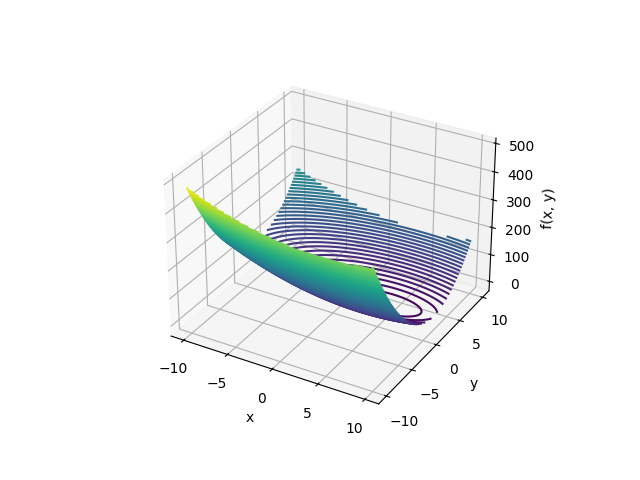

In [19]:
def descent(x, func_gradient, alpha, epsilon, breakpoint='derivative'):
    x_new = np.zeros(x.shape)
    trajectory = np.array([x])
    i = 0

    while True:

        x_new = x - alpha * func_gradient(x)

        if breakpoint == 'gradient':
            if abs(func(x_new)) < epsilon:
                break
        elif breakpoint == 'function':
            if abs(func(x) - func(x_new)) < epsilon:
                break
        elif breakpoint == 'steps':
            if np.linalg.norm(x - x_new) < epsilon:
                break

        # Uncomment to see the steps
        # print('Step:', i, 'x:', x, 'f(x):', func(x))
        
        i += 1
        x = x_new
        trajectory = np.append(trajectory, [x])
    
    return x_new, trajectory.reshape(-1, 2), i

# Starting variables
x_start = np.array([-9, -9])
alpha = 0.01
epsilon = 0.0001
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)

# Calling the function
x_min, trajectory, steps = descent(x_start, func_grad, alpha, epsilon, breakpoint='steps')

print('Minimum point:', x_min)
print('Number of steps:', steps)

# Plot the function
plot_func(func, x, y, x_start, x_min, trajectory, type=1)

* The method of Steepest Descent

- Wolfe Conditions for Line Search
- Armijo Rule

Minimum point: [4.49975864 2.3       ]
Number of steps: 37
Alpha values: [1.   0.25 0.25] ... [0.25 0.25 0.25]


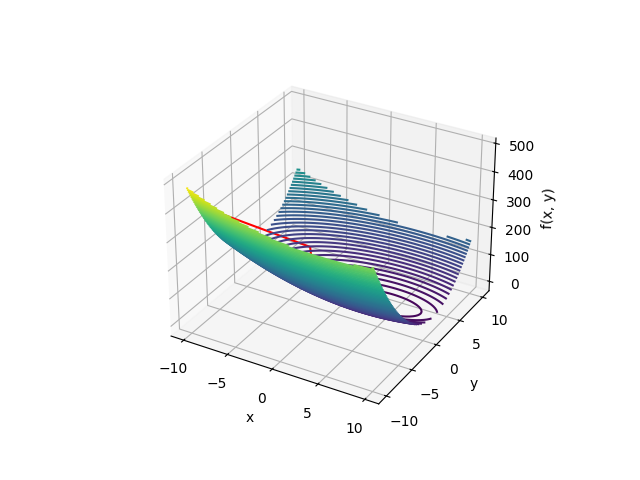

In [20]:
def sufficient_decrease_rule(x_k, alpha, func, func_gradient, c=10**-4, epsilon=10**-6):
    '''
    Backtracking line search using the SDC

    Parameters:
    x_k - current point
    alpha - step size
    func - function to optimize
    func_gradient - gradient of the function
    c - constant (default 10^-4)
    p - constant (default 0.5)
    epsilon - tolerance (default 10^-6)

    Returns:
    aplha - the new step size  
    
    '''
    while func(x_k - alpha * func_gradient(x_k)) > func(x_k) - c * alpha * func_gradient(x_k).T @ func_gradient(x_k):
        alpha /= 2
    
        if alpha < epsilon:
            break

    return alpha

def steepest_descent(x, func_gradient, epsilon, max_iter=10000, breakpoint='derivative'):
    x_new = np.zeros(x.shape)
    trajectory = np.array([x])
    alpha = 1.0
    alpha_values = np.array([alpha])
    i = 0

    while i < max_iter:

        # Calculate the alpha using the Armijo rule
        alpha = sufficient_decrease_rule(x, alpha, func, func_gradient)
        x_new = x - alpha * func_gradient(x)

        # Store the values
        alpha_values = np.append(alpha_values, alpha)
        trajectory = np.append(trajectory, [x], axis=0)

        if breakpoint == 'gradient':
            if abs(func(x_new)) < epsilon:
                break
        elif breakpoint == 'function':
            if abs(func(x) - func(x_new)) < epsilon:
                break
        elif breakpoint == 'steps':
            if np.linalg.norm(x - x_new) < epsilon:
                break

        # Uncomment to see the steps
        # print('Step:', i, 'x:', x, 'f(x):', func(x))
        
        i += 1
        x = x_new     
    
    return x_new, trajectory.reshape(-1, 2), i, alpha_values


'''Starting variables'''
x_start = np.array([-9, -9])
epsilon = 0.0001
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)

# Calling the function
x_min, trajectory, steps, alpha_values = steepest_descent(x_start, func_grad, epsilon, breakpoint='steps')

print('Minimum point:', x_min)
print('Number of steps:', steps)

if alpha_values.size > 10:
    print('Alpha values:', alpha_values[:3], '...', alpha_values[-3:])
else:
    print('Alpha values:', alpha_values)

# Plot the function
plot_func(func, x, y, x_start, x_min, trajectory, type=1)

* Conjugate Direction Method
* Conjugate Gradient Method
* Stochastic Gradient Descent
* Gradient Descent with Momentum
* Nesterov Accelerated Gradient
* Backpropagation
* Newton's Method
* Adam Optimization
* Simplex Method